
# Machine Learning Engineer Nanodegree - Omoju Miller
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor


# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 
                    1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


In [2]:
print city_data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
print CLIENT_FEATURES[0]

[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [4]:
print "There are %d data points in the dataset." % len(city_data.target)

There are 506 data points in the dataset.


In [5]:
# Number of houses in the dataset
# Number of features in the dataset
total_houses, total_features = city_data.data.shape


# Minimum housing value in the dataset
minimum_price = np.amin(city_data.target) 

# Maximum housing value in the dataset
maximum_price = np.amax(city_data.target) 

# Mean house value of the dataset
mean_price = np.mean(city_data.target) 

# Median house value of the dataset
median_price = np.median(city_data.target)

# Standard deviation of housing values of the dataset
std_dev = np.std(city_data.target) 

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

1. DIS: weighted distances to five Boston employment centres 
2.  PTRATIO: pupil-teacher ratio by town 
3. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 



## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [6]:
someArray = [7, 10, 11]
def mapTargetData(someArray):
    for i in range(len(someArray)):
        print city_data.feature_names[someArray[i]], \
               "in the target is {0:.3f}".format(CLIENT_FEATURES[0][someArray[i]])

print mapTargetData(someArray)



DIS in the target is 1.385
PTRATIO in the target is 20.200
B in the target is 332.090
None


In [7]:
# Another way to do this is as follow:
chosen_features = ['PTRATIO', 'B', 'DIS'] 
features = city_data.feature_names.tolist() 

for feature in chosen_features:
    index = features.index(feature) 
    print CLIENT_FEATURES[0][index]

20.2
332.09
1.385


**Answer: **

- DIS in the target is 1.385
- PTRATIO in the target is 20.200
- B in the target is 332.090


# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [8]:
len(city_data.data)

506

In [9]:
# Put any import statements you need for this code block here
from sklearn import cross_validation



def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
    


    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*


**Answer: **


- If we used all the data we had for training, we would build a model that had very high variance. It would have learnt all the nuances in our data, and would **not** be unable to general when a new datapoint is introduced. To prevent this, we save a proportion of our data for testing. We do this to as a check on overfitting.

- In addition, splitting data into testing and training subsets helps us give sound estimate of performance on an independent dataset.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [10]:
# Put any import statements you need for this code block here
from sklearn import metrics

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    

    error = metrics.mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **

Since we are doing a prediction, that means we will be creating a model for **regression**, as such the appropriate metrics to use for evaluation are **Mean Absolute Error(MAE)** and **Mean Squared Error(MSE)**.

The performance metric that is most appropriate for predicting housing prices and analyzing the total error is the ** MSE**.

The best regression is the one that minimizes this: 
$$\sum_{allNtrainingpoints}^{\infty} (Y_i - \hat{Y}_i)^2 $$

There can be multiple regression lines than *minimizes* $\sum||error||$ however, there is **only one line** that minimizes the $\sum(error)^2$.

NB:
One should note that although **MSE** punishes larger errors more heavily than **MAE** they both will guide models to almost the same solution if *no outliers* are present and enough iterations are performed.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [11]:
# Put any import statements you need for this code block
from sklearn import tree
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """
    
    # Create a decision tree regressor object
    regressor = tree.DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

- ```GridSearchCV``` is a way of systematically working through multiple combinations of parameters, seeking the combinations that optimizes the function. It is applicable when we don't know apriori which are the best parameters for us to use to tune our model.
- The algorithm also has a performance metric that is used to evaluate the effectiveness of the parameters found. Its performance is determined by cross validating on a subset of held out training data.
- Because the performance metric used to evaluate this model is an *error,* we need to advise the ```GridSearchCV```algorithm to minimize the score by setting ```greater_is_better=False``` in the ```make_scorer``` function.

### Pro tip: 
- There are other techniques that could be used for hyperparameter optimization in order to save time like ```RandomizedSearchCV```, in this case instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions. This proves useful when we need to save time but is not necessary in cases like ours where the data set is relatively small.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

- Just as is done when learning the function which best describes the data, a ```GridSearchCV``` algorithm also needs a performance metric to determine when it has optimally tuned parameters. 

- When the learner is in the process of discovering the ideal function which describes the data, in order to prevent over fitting, we hold out a piece of the data and use it as a **test** set. 

- If ```GridSearchCV``` is used to optimize parameters in our model, and we test those parameters out on the **test** set, information from that sample can eventually leak into our model, which reduces its ability to generalize. As a means of preventing this, a sample of the data is held out in an **evaluation** set which the algorithm tests on. 

- Each combination of parameters is evaluated against this evaluation set. A method of doing this is called **Cross Validation.** It is a process of testing out parameter optimization on an data sample that is independent of both the testing and training data.

- In the case of **K-fold CV** the data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. Once the parameters are optimally tuned, the scientist can test the efficacy of the final model on the test set. 

- Cross validation is useful because it maximizes both the training and testing data so that the data can be used to provide the best learning result and the best validation result. 

- Especially when K-fold cross validation is used in conjunction with grid search we know that the final parameters that result from our process of iterative search of the parameter hyperspace are those that accurately maximizes, or in our case, minimizes the error for the dataset. If we limit the grid search to a single dataset for example, we would overfit the parameters of the model to that particular dataset.



# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [12]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    from sklearn.metrics import mean_squared_error as mse
    
    print "Creating learning curve graphs for max_depths of 1, 6, 8, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    print "\n ********stats on regressor********\n"
    print "max-depth MSE \tVariance"
    for k, depth in enumerate([1,6,8,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
        
        RMSE = mse(y_train[:s], regressor.predict(X_train[:s]))

        print '{0:1d} \t {1:.2f} \t {2:.2f}'.format(depth, 
                    RMSE, regressor.score(X_train[:s], y_train[:s]))
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [13]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 10
    max_depth = np.arange(1, 10)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 6, 8, and 10. . .

 ********stats on regressor********

max-depth MSE 	Variance
1 	 48.94 	 0.46
6 	 4.09 	 0.95
8 	 1.86 	 0.98
10 	 0.67 	 0.99


/Users/omojumiller/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


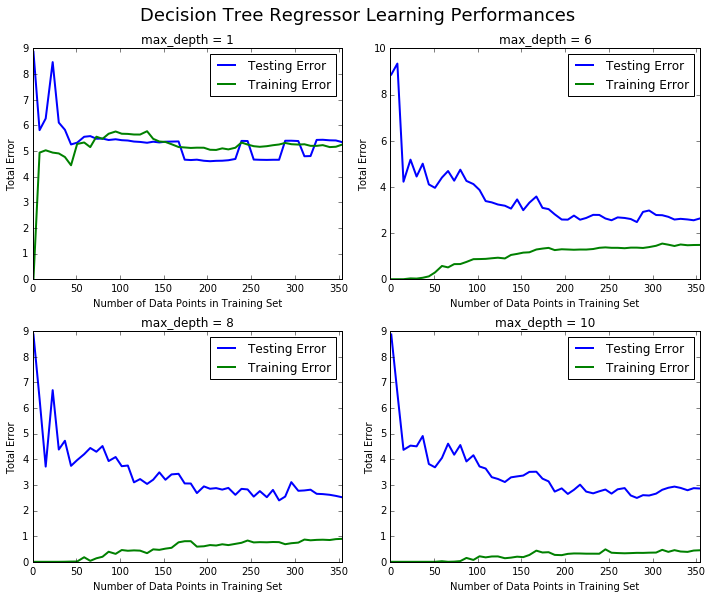

In [14]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

- I am chosing the model that has a **```max_depth=1```**. 

### Testing error rate

- The model is underfitting is not able to sufficiently reduce even the training error. On the first 30 or so data points, the error rate across the four learning models starts off around 6 and drops to some where between 5 and 6 for this particular model. From that, we can infer that this model doesn't really learn alot from the training set as the testing error doesn't really drop any further. 

### Training error rate

- The behaivor of the testing error closely mirrors that of the training error. Our model quickly converges and we are really unable to gain more performance from our model as the data set increases.





## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

max-depth | MSE | Variance
--- | --- | ---
1 	 |45.27  |0.50
6 	 |4.38 	 |0.95
8 	 |1.86 	 |0.98
10 	 |0.75 	 |0.99

From the stats presented in the table, we can conclude that for the model with **max depth = 1**
- It exhibits high bias. The model is underfitting, it is even unable to reduce the training error. From the graph, we can see that the training error is rather high, it converges around 5. Furthermore, the **MSE**--my preferred performance metric for this problem--supports this diagnosis because the error is very high, relative to the other models.

Similarly, for the model with **max depth = 10**
- It exhibits high variance because the variance is almost 1, the highest score a variance could take which indicates the highest level of variance. The model if overfitting and produces a much larger testing error, relative to the other models.





Creating a model complexity graph. . . 


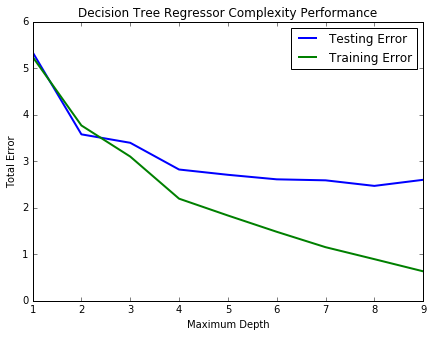

In [15]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

- The for the depths below 2, the bias in our model is high as we can see that the error is high. By the a max depth of 5, we see that our training and testing error start to diverge even more. Our testing error starts going up, but or training error continues to decrease. This lets us know that we are now entering a zone where our variance is increasing, and our models ability to general is beginning to wane, we are starting to slowly overfit our data.


- The split of data is random each time, as a result, there will be small variance each time the code is run. In this case, the optimal model is the turning point at which the training error is low and testing error is at global minimum. For this model that occurs at a **max depth = 5** 

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [16]:
n = 50
optimal_max_depth = np.zeros(n)
for i in range(n):
    
    reg = fit_model(housing_features, housing_prices)
    optimal_max_depth[i] = reg.get_params()['max_depth']
    
print "After running the code %d times and averaging the max_depth," % n
print "the final model has an optimal max_depth parameter of %d" % np.average(optimal_max_depth)

After running the code 50 times and averaging the max_depth,
the final model has an optimal max_depth parameter of 5


In [17]:
print "Final model has an optimal max_depth parameter of %d" % np.average(optimal_max_depth)

Final model has an optimal max_depth parameter of 5


**Answer: **

The final model has optimal max_depth parameter of 5, it makes sense based on the complexity curve because at a max_depth of 5 is where we see the testing error starts to increase cueing us in on the fact that we might be overfitting our data.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [18]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])
print "Standard deviation of house price: {0:.3f}".format(std_dev)


Predicted value of client's home: 21.630
Standard deviation of house price: 9.188


**Answer: **

Its slightly below the median price of homes in Boston. The predicted value is between one standard deviation from the mean.

Mean house price: 22.533

Median house price: 21.2

#### Pro tip: 
To assess if your prediction is reasonable, besides from comparing it with the median, the mean and checking if it is included in one standard deviation range, you could use SKlearn to find the nearest neighbours of the feature vector and see how your result compares with them.

```python
from sklearn.neighbors import NearestNeighbors
def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
   neigh = NearestNeighbors( n_neighbors = 10 )
   neigh.fit( X)
   distance, indexes = neigh.kneighbors( x )
   return indexes
indexes = find_nearest_neighbor_indexes(x, X)
sum_prices = []
for i in indexes:
    sum_prices.append(city_data.target[i])
neighbor_avg = np.mean(sum_prices)
print "Nearest Neighbors average: " +str(neighbor_avg)
```
[Scikit-learn: Finding the Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html#finding-the-nearest-neighbors)

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

I would **not** use this model because the variance is too high. I ran a linear regression on the data and got a better **variance** score. From the image below, the left figure shows the scatter plot of the *predicted prices* versus the *actual* prices from the decision tree regressor model. The right figure shows the output of the same dataset when it uses a model for linear regression. 

![Linear Regression versus Decision Tree](download.png)

#### Questions to consider:
- Would additional data points (or the inclusion of data per year) benefit the model?
- Is there a possibility of outliers in the data that can drastically change predictive results? 
- Does this dataset feature enough characteristics about homes to be considered robust? 



In [ ]:
import pandas as pd
import scipy.stats as stats


In [ ]:
bos = pd.DataFrame(city_data.data)
bos.columns = city_data.feature_names
bos['PRICE'] = city_data.target

### Linear Regression


In [ ]:
from sklearn import cross_validation

X = bos.drop('PRICE', axis = 1)
lm_X_train, lm_X_test, lm_y_train, lm_y_test = cross_validation.train_test_split(X, 
                                                            bos.PRICE, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(lm_X_train, lm_y_train)
lm.predict(CLIENT_FEATURES)

In [ ]:
from sklearn.metrics import mean_squared_error as mse


print "MSE for decison tree = %0.2f" % mse(y_test, reg.predict(X_test))
print "Variance score for decison tree: %.2f" % reg.score(X_test, y_test)

# The mean square error
print "MSE for linear regression: %.2f" % mse(lm_y_train, lm.predict(lm_X_train))

print "Variance for linear regression: %.2f" % lm.score(lm_X_train, lm_y_train)


# Plot outputs


pl.subplot(1, 2, 1)
pl.scatter(y_train, reg.predict(X_train))
pl.xlabel("Prices: $Y_i$")
pl.ylabel("Predicted prices: $\hat{Y}_i$")
pl.title("Decision Tree")
pl.yticks(range(-10,60,10))



pl.subplot(1, 2, 2)
pl.scatter(lm_y_train, lm.predict(lm_X_train))
pl.xlabel("Prices: $Y_i$")
pl.ylabel("Predicted prices: $\hat{Y}_i$")
pl.title("Linear Regression")
pl.yticks(range(-10,60,10))

pl.subplots_adjust( hspace=0.45, wspace=0.7)

pl.show()

